# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=123)

In [12]:
app_train['AMT_INCOME_TOTAL'].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [19]:
app_train["equal_width_AMT_ANNUITY"] = pd.cut(app_train["AMT_ANNUITY"], 20)

In [20]:
app_train["equal_width_AMT_ANNUITY"]

0         (14436.0, 27256.5]
1         (27256.5, 40077.0]
2         (1359.09, 14436.0]
3         (27256.5, 40077.0]
4         (14436.0, 27256.5]
                 ...        
307506    (27256.5, 40077.0]
307507    (1359.09, 14436.0]
307508    (27256.5, 40077.0]
307509    (14436.0, 27256.5]
307510    (40077.0, 52897.5]
Name: equal_width_AMT_ANNUITY, Length: 307511, dtype: category
Categories (20, interval[float64, right]): [(1359.09, 14436.0] < (14436.0, 27256.5] < (27256.5, 40077.0] < (40077.0, 52897.5] ... (206743.5, 219564.0] < (219564.0, 232384.5] < (232384.5, 245205.0] < (245205.0, 258025.5]]

In [21]:
app_train['equal_width_AMT_ANNUITY'].value_counts()

(14436.0, 27256.5]      119572
(27256.5, 40077.0]       79169
(1359.09, 14436.0]       59384
(40077.0, 52897.5]       33283
(52897.5, 65718.0]       10775
(65718.0, 78538.5]        3624
(78538.5, 91359.0]         833
(91359.0, 104179.5]        435
(104179.5, 117000.0]       215
(117000.0, 129820.5]        87
(129820.5, 142641.0]        41
(219564.0, 232384.5]        25
(142641.0, 155461.5]        20
(168282.0, 181102.5]        18
(206743.5, 219564.0]         8
(155461.5, 168282.0]         4
(193923.0, 206743.5]         3
(181102.5, 193923.0]         2
(245205.0, 258025.5]         1
(232384.5, 245205.0]         0
Name: equal_width_AMT_ANNUITY, dtype: int64

In [22]:
dfd  = app_train.groupby('equal_width_AMT_ANNUITY').mean()
dfd

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
equal_width_AMT_ANNUITY,,,,,,,,,,,,,,,,,,,,,
"(1359.09, 14436.0]",277758.535936,0.069278,0.330880,0.265240,0.717062,0.410666,1.223269e+05,2.022270e+05,10639.597324,1.852841e+05,...,0.000387,0.000135,0.001583,0.006520,0.006797,0.031595,0.209287,0.244062,1.836179,0.231982
"(14436.0, 27256.5]",278406.931974,0.086785,0.053416,0.302487,0.680477,0.395511,1.486550e+05,4.563266e+05,21175.860774,4.055104e+05,...,0.000611,0.000460,0.000042,0.005894,0.006841,0.033749,0.256464,0.266184,1.943865,0.208870
"(27256.5, 40077.0]",278288.747679,0.090237,0.020778,0.379782,0.692026,0.440943,1.847147e+05,7.865231e+05,32996.208819,6.985132e+05,...,0.000531,0.000543,0.000013,0.006632,0.007413,0.032709,0.289659,0.274716,1.917222,0.132337
"(40077.0, 52897.5]",277559.734429,0.068954,0.027912,0.439744,0.704263,0.439504,2.265351e+05,1.039366e+06,45625.125214,9.434002e+05,...,0.000901,0.000721,0.000060,0.007178,0.006523,0.039170,0.319368,0.272260,1.877795,0.129375
"(52897.5, 65718.0]",279073.984316,0.066636,0.014571,0.487053,0.689002,0.445940,2.659746e+05,1.229464e+06,57593.671601,1.131805e+06,...,0.000742,0.001578,0.000000,0.006809,0.008512,0.050963,0.339823,0.280668,1.840621,0.109234
"(65718.0, 78538.5]",280205.396523,0.034216,0.120309,0.495861,0.701159,0.412252,3.215465e+05,1.406261e+06,69864.501656,1.313759e+06,...,0.001932,0.001656,0.000000,0.007237,0.005921,0.037500,0.345066,0.261842,1.534211,0.126104
"(78538.5, 91359.0]",275139.707083,0.037215,0.024010,0.534214,0.685474,0.433373,3.345815e+05,1.354933e+06,84179.906363,1.295505e+06,...,0.000000,0.003601,0.000000,0.008708,0.005806,0.031930,0.343977,0.319303,1.743106,0.106843
"(91359.0, 104179.5]",276684.528736,0.034483,0.013793,0.535632,0.712644,0.436782,3.635738e+05,1.372427e+06,96481.417241,1.320988e+06,...,0.000000,0.000000,0.000000,0.011111,0.002778,0.066667,0.386111,0.325000,1.844444,0.119540
"(104179.5, 117000.0]",266139.739535,0.018605,0.111628,0.558140,0.688372,0.427907,4.261123e+05,1.478338e+06,110386.862791,1.446174e+06,...,0.000000,0.000000,0.000000,0.005714,0.028571,0.051429,0.251429,0.222857,1.788571,0.139535


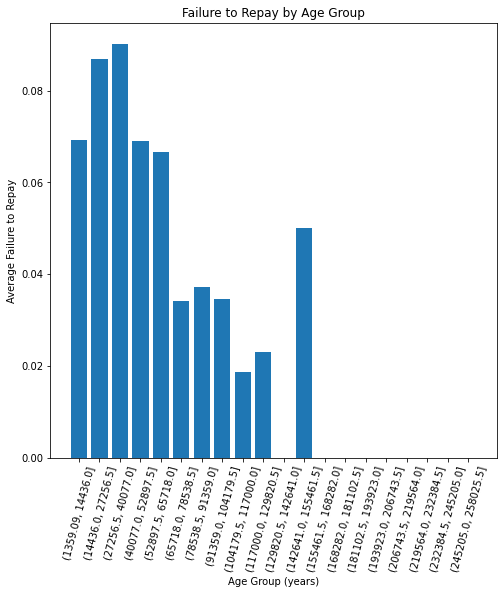

In [27]:
fig = plt.figure(figsize = (8, 8))
ax = fig.subplots()

# 繪製目標值平均與分組組別的長條圖
ax.bar(range(len(dfd.index)), dfd['TARGET'])
# 加上 X, y 座標說明, 以及圖表的標題
ax.set_xticks(range(len(dfd.index)), dfd.index, rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Average Failure to Repay')
ax.set_title('Failure to Repay by Age Group');